# NLP Toolkits and Preprocessing Exercises

## Introduction

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [35]:
import nltk
# nltk.download() <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data = pd.read_csv('Downloads/NLP_v01-class2/data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

## Answer to Question 1##

In [37]:
###   1.                          Determine how many reviews there are in total.

d_reviews = data['reviews']

num_of_reviews = len(d_reviews)
num_of_reviews

913

In [38]:
###   2.                         Determine the percent of 1, 2, 3, 4 and 5 star reviews.
one_star = []
two_star = []
Three_star = []
four_star = []
Five_star = []

for index, row in data.iterrows():
    #print(row[1])
    if row[1] == 1:
        one_star.append(row[1])
    if row[1] == 2:
        two_star.append(row[1])
    if row[1] == 3:
        Three_star.append(row[1])
    if row[1] == 4:
        four_star.append(row[1])
    if row[1] == 5:
        Five_star.append(row[1])

print("Rating Percentages: ")
print()

###        percent of 1 star 
num1 = len(one_star)
num2 = len(data)
result = '{0:.2f}%'.format((num1 / num2 * 100))
print('1_star : ',result)


###     percent of 2 star 
num1 = len(two_star)
num2 = len(data)


result = '{0:.2f}%'.format((num1 / num2 * 100))
print('2_star : ',result)

###     percent of 3 star 
num1 = len(Three_star)
num2 = len(data)
result = '{0:.2f}%'.format((num1 / num2 * 100))
print('3_star : ', result)

###     percent of 4 star 
num1 = len(four_star)
num2 = len(data)
result = '{0:.2f}%'.format((num1 / num2 * 100))
print('4_star :',result)

###     percent of 5 star 
num1 = len(Five_star)
num2 = len(data)
result = '{0:.2f}%'.format((num1 / num2 * 100))
print('5_star ',result)

Rating Percentages: 

1_star :  0.44%
2_star :  1.31%
3_star :  6.13%
4_star : 23.77%
5_star  68.35%


In [5]:
###  3   Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


dd = data['reviews']

new_list_word_tokenize1 = []
freq_d = []
for i in range(len(dd)):
    texts = dd[i]
    new_txts = word_tokenize(texts)
    new_list_word_tokenize1.append([new_txts])

#print(new_list_word_tokenize1)
print(len(new_list_word_tokenize1))

new_list_word_tokenize1 = sum(new_list_word_tokenize1, [])
#print(new_list_word_tokenize1)
for i in new_list_word_tokenize1:
    freq_distribution = FreqDist(i)
    freq_d.append(freq_distribution)
    print(freq_distribution)
    #print(type(freq_distribution))

913
<FreqDist with 23 samples and 29 outcomes>
<FreqDist with 157 samples and 320 outcomes>
<FreqDist with 44 samples and 53 outcomes>
<FreqDist with 78 samples and 112 outcomes>
<FreqDist with 29 samples and 37 outcomes>
<FreqDist with 31 samples and 42 outcomes>
<FreqDist with 28 samples and 35 outcomes>
<FreqDist with 25 samples and 32 outcomes>
<FreqDist with 104 samples and 192 outcomes>
<FreqDist with 21 samples and 23 outcomes>
<FreqDist with 39 samples and 48 outcomes>
<FreqDist with 22 samples and 26 outcomes>
<FreqDist with 75 samples and 111 outcomes>
<FreqDist with 25 samples and 28 outcomes>
<FreqDist with 37 samples and 47 outcomes>
<FreqDist with 30 samples and 33 outcomes>
<FreqDist with 57 samples and 74 outcomes>
<FreqDist with 26 samples and 29 outcomes>
<FreqDist with 39 samples and 52 outcomes>
<FreqDist with 39 samples and 55 outcomes>
<FreqDist with 79 samples and 112 outcomes>
<FreqDist with 45 samples and 58 outcomes>
<FreqDist with 28 samples and 31 outcomes>


In [ ]:
#      To plot all

#for ii in freq_d:
#    ii.plot(30, cumulative=False)
#    plt.show()
#   

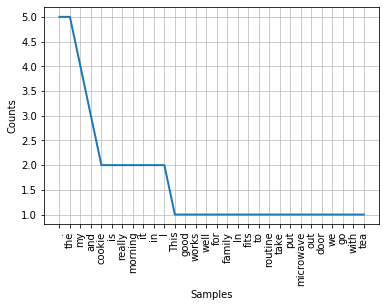

In [39]:
#ploting one 
freq_distribution.plot(30, cumulative=False)
plt.show()
    

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
  Hint #1: Use regular expressions.
  
  Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

## Answers to Question 2

In [40]:
#                              Apply the following preprocessing steps:


###   1. Remove all words that contain numbers
dd = data['reviews']

new_list_removed_number = []
for i in range(len(dd)):
    texts = dd[i]
    new_text = re.sub('\w*\d\w*', ' ', texts)
    new_list_removed_number.append(new_text)

print(new_list_removed_number)
print(len(new_list_removed_number))

['I love these cookies!  Not only are they healthy but they taste great and are so soft!  I will definitely add these to my grocery list!', 'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at  : .<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />N

In [41]:
###   2. Make all the text lowercase

new_list_lower_case = []
for i in range(len(new_list_removed_number)):
    texts = new_list_removed_number[i].lower()
    new_list_lower_case.append(texts)

print(new_list_lower_case)
print(len(new_list_lower_case))

['i love these cookies!  not only are they healthy but they taste great and are so soft!  i will definitely add these to my grocery list!', 'quaker soft baked oatmeal cookies with raisins are a delicious treat, great for anytime of day.  for example:<br /><br />--at breakfast, i had one with a large banana and a cup of coffee, and felt i\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, i had one with a glass of milk, and was satisfied enough to not need a snack before dinner at  : .<br /><br />--the following night, after dinner, i had one with the remainder of my glass of wine. (delicious!) and again, didn\'t feel the need to snack later in the evening.<br /><br />each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. natural flavors used in the making are cinnamon and all spice.  these flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />n

In [42]:
###   3. Remove punctuation

new_list_removed_punct = []
for i in range(len(new_list_lower_case)):
    texts = new_list_lower_case[i]
    new_txt = re.sub('[%s]' % re.escape(string.punctuation), ' ', texts)
    new_list_removed_punct.append(new_txt)

print(new_list_removed_punct)
print(len(new_list_removed_punct))

['i love these cookies   not only are they healthy but they taste great and are so soft   i will definitely add these to my grocery list ', 'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example  br    br     at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day  br    br     the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at      br    br     the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening  br    br   each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste  br    br   nut

In [43]:
### 4. Tokenize the reviews into words

new_list_word_tokenize = []
from nltk.tokenize import word_tokenize
for i in range(len(new_list_removed_punct)):
    texts = new_list_removed_punct[i]
    new_txts = word_tokenize(texts)
    new_list_word_tokenize.append([new_txts])

print(new_list_word_tokenize)
print(len(new_list_word_tokenize))

[[['i', 'love', 'these', 'cookies', 'not', 'only', 'are', 'they', 'healthy', 'but', 'they', 'taste', 'great', 'and', 'are', 'so', 'soft', 'i', 'will', 'definitely', 'add', 'these', 'to', 'my', 'grocery', 'list']], [['quaker', 'soft', 'baked', 'oatmeal', 'cookies', 'with', 'raisins', 'are', 'a', 'delicious', 'treat', 'great', 'for', 'anytime', 'of', 'day', 'for', 'example', 'br', 'br', 'at', 'breakfast', 'i', 'had', 'one', 'with', 'a', 'large', 'banana', 'and', 'a', 'cup', 'of', 'coffee', 'and', 'felt', 'i', 'd', 'had', 'a', 'relatively', 'healthy', 'start', 'to', 'the', 'day', 'br', 'br', 'the', 'next', 'day', 'at', 'lunch', 'following', 'a', 'tuna', 'sandwich', 'i', 'had', 'one', 'with', 'a', 'glass', 'of', 'milk', 'and', 'was', 'satisfied', 'enough', 'to', 'not', 'need', 'a', 'snack', 'before', 'dinner', 'at', 'br', 'br', 'the', 'following', 'night', 'after', 'dinner', 'i', 'had', 'one', 'with', 'the', 'remainder', 'of', 'my', 'glass', 'of', 'wine', 'delicious', 'and', 'again', 'didn

In [44]:
####  #                             Find the most common words.

import collections

most_common_words = []
counted = []

for i in range(len(new_list_word_tokenize)):
    texts = new_list_word_tokenize[i]
    texts = sum(texts, [])
    counter = collections.Counter(texts)
    #print(counter.most_common())
    counted.append(counter.most_common())

all_nums = []
for i in range(len(counted)):
    texts = counted[i]
    for ii in texts:
        #print(ii[1])
        all_nums.append(ii[1])

max_num = max(all_nums) # get the maximum of the counts
#print(max_num)

for i in range(len(counted)):
    texts = counted[i]
    for ii in texts:
        if ii[1] > max_num - 15  :
            if ii[0] not in most_common_words:
                most_common_words.append(ii[0])
            
print('most common words  = ', most_common_words)

most common words  =  ['the', 'br']


In [45]:
#                   Determine the word length distribution over the entire corpus.

import collections

new_list_word = sum(new_list_word_tokenize, [])
new_word = sum(new_list_word, [])
#print(new_word)


counter = collections.Counter(new_word)
counter = counter.most_common()
print(counter)
        

[('i', 2145), ('and', 1755), ('the', 1652), ('a', 1310), ('it', 1028), ('to', 991), ('my', 845), ('cookies', 843), ('cookie', 842), ('of', 780), ('are', 746), ('they', 738), ('soft', 707), ('these', 665), ('was', 662), ('for', 594), ('in', 562), ('this', 549), ('oatmeal', 482), ('is', 466), ('them', 449), ('that', 421), ('so', 391), ('br', 379), ('not', 366), ('but', 353), ('good', 349), ('quaker', 343), ('you', 342), ('with', 322), ('t', 315), ('have', 311), ('like', 297), ('taste', 294), ('love', 291), ('great', 291), ('influenster', 281), ('as', 275), ('from', 251), ('baked', 243), ('one', 239), ('on', 234), ('loved', 228), ('very', 225), ('more', 222), ('be', 211), ('just', 202), ('raisins', 199), ('will', 197), ('delicious', 197), ('try', 191), ('chewy', 190), ('kids', 186), ('really', 186), ('received', 186), ('were', 185), ('s', 183), ('raisin', 179), ('snack', 171), ('would', 171), ('or', 171), ('box', 168), ('out', 158), ('me', 156), ('buy', 146), ('had', 145), ('go', 141), ('

## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

## Answers to Question 3

In [46]:
#                 Apply the following preprocessing techniques:

### Remove stopwords

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.append('br') # lets add the 'br' to stopwords as it's the most common and doesn't make sense either.
Stop_W = []

new_list_remove_stopwords = []
for i in range(len(new_list_word_tokenize)):
    texts = new_list_word_tokenize[i]
    texts = sum(texts, [])
    new_tt = [word for word in texts if word not in stop_words]
    new_t = [word for word in texts if word in stop_words] # words that are removed 
    new_list_remove_stopwords.append(new_tt)
    Stop_W.append(new_t)
    
#print('Stop_Words   = ', Stop_W)

print(new_list_remove_stopwords)
print(len(new_list_remove_stopwords))

[['love', 'cookies', 'healthy', 'taste', 'great', 'soft', 'definitely', 'add', 'grocery', 'list'], ['quaker', 'soft', 'baked', 'oatmeal', 'cookies', 'raisins', 'delicious', 'treat', 'great', 'anytime', 'day', 'example', 'breakfast', 'one', 'large', 'banana', 'cup', 'coffee', 'felt', 'relatively', 'healthy', 'start', 'day', 'next', 'day', 'lunch', 'following', 'tuna', 'sandwich', 'one', 'glass', 'milk', 'satisfied', 'enough', 'need', 'snack', 'dinner', 'following', 'night', 'dinner', 'one', 'remainder', 'glass', 'wine', 'delicious', 'feel', 'need', 'snack', 'later', 'evening', 'cookie', 'individually', 'packaged', 'texture', 'soft', 'moist', 'right', 'amount', 'sweetness', 'natural', 'flavors', 'used', 'making', 'cinnamon', 'spice', 'flavorings', 'give', 'cookies', 'real', 'old', 'fashioned', 'homemade', 'taste', 'nutritionally', 'cookies', 'calories', 'saturated', 'fat', 'mg', 'sodium', 'sugar', 'also', 'protein', 'contain', 'fiber', 'calorie', 'count', 'may', 'seem', 'bit', 'high', 'o

In [47]:
###  Perform parts of speech tagging

from nltk.tag import pos_tag

new_list_Parts_of_speech_tagging = []
for i in range(len(new_list_remove_stopwords)):
    texts = new_list_remove_stopwords[i]
    tokens = pos_tag(texts)
    new_list_Parts_of_speech_tagging.append(tokens)


    
#print('Stop_Words   = ', Stop_W)
print(new_list_Parts_of_speech_tagging)
print(len(new_list_Parts_of_speech_tagging))

[[('love', 'VB'), ('cookies', 'NNS'), ('healthy', 'JJ'), ('taste', 'NN'), ('great', 'JJ'), ('soft', 'JJ'), ('definitely', 'RB'), ('add', 'VBP'), ('grocery', 'JJ'), ('list', 'NN')], [('quaker', 'NN'), ('soft', 'JJ'), ('baked', 'VBD'), ('oatmeal', 'JJ'), ('cookies', 'NNS'), ('raisins', 'VBZ'), ('delicious', 'JJ'), ('treat', 'NN'), ('great', 'JJ'), ('anytime', 'JJ'), ('day', 'NN'), ('example', 'NN'), ('breakfast', 'NN'), ('one', 'CD'), ('large', 'JJ'), ('banana', 'NN'), ('cup', 'NN'), ('coffee', 'NN'), ('felt', 'VBD'), ('relatively', 'RB'), ('healthy', 'JJ'), ('start', 'VBP'), ('day', 'NN'), ('next', 'JJ'), ('day', 'NN'), ('lunch', 'NN'), ('following', 'VBG'), ('tuna', 'NN'), ('sandwich', 'JJ'), ('one', 'CD'), ('glass', 'NN'), ('milk', 'NN'), ('satisfied', 'VBD'), ('enough', 'JJ'), ('need', 'NN'), ('snack', 'NN'), ('dinner', 'NN'), ('following', 'VBG'), ('night', 'NN'), ('dinner', 'NN'), ('one', 'CD'), ('remainder', 'NN'), ('glass', 'NN'), ('wine', 'VBP'), ('delicious', 'JJ'), ('feel', 'N

In [48]:
###      Perform stemming

from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()


new_list_Perform_stemming = []
for i in range(len(new_list_remove_stopwords)):
    texts = new_list_remove_stopwords[i]
    mew = []
    for ii in texts:
        #texts = sum(ii, [])
        texts = stemmer.stem(ii)
        mew.append(texts)
    new_list_Perform_stemming.append(mew)
    
print(new_list_Perform_stemming)

[['lov', 'cooky', 'healthy', 'tast', 'gre', 'soft', 'definit', 'ad', 'grocery', 'list'], ['quak', 'soft', 'bak', 'oatm', 'cooky', 'raisin', 'delicy', 'tre', 'gre', 'anytim', 'day', 'exampl', 'breakfast', 'on', 'larg', 'banan', 'cup', 'coff', 'felt', 'rel', 'healthy', 'start', 'day', 'next', 'day', 'lunch', 'follow', 'tun', 'sandwich', 'on', 'glass', 'milk', 'satisfy', 'enough', 'nee', 'snack', 'din', 'follow', 'night', 'din', 'on', 'remaind', 'glass', 'win', 'delicy', 'feel', 'nee', 'snack', 'lat', 'ev', 'cooky', 'individ', 'pack', 'text', 'soft', 'moist', 'right', 'amount', 'sweet', 'nat', 'flav', 'us', 'mak', 'cinnamon', 'spic', 'flav', 'giv', 'cooky', 'real', 'old', 'fash', 'homemad', 'tast', 'nutrit', 'cooky', 'cal', 'sat', 'fat', 'mg', 'sod', 'sug', 'also', 'protein', 'contain', 'fib', 'cal', 'count', 'may', 'seem', 'bit', 'high', 'on', 'cooky', 'good', 'siz', 'cooky', 'per', 'serv', 'certain', 'enough', 'satisfy', 'gre', 'tast', 'text', 'kid', 'prob', 'enjoy', 'also', 'lik', 'oat

## Creating a new Dataframe(adding the processed 'reviews')

In [49]:
import pandas as pd 
# initialise data of lists. 

userID = []
rating = []
list_reviews = []


for index, row in data.iterrows():
    userID.append(row[0])
    rating.append(row[1])
    list_reviews.append(row[2])

dataa = {'user_id':userID, 'stars':rating, 'reviews': list_reviews, 'processed_reviews':new_list_Perform_stemming} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(dataa) 
  
# print the data 
df 

,user_id,stars,reviews,processed_reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,"[lov, cooky, healthy, tast, gre, soft, definit..."
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,"[quak, soft, bak, oatm, cooky, raisin, delicy,..."
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,"[us, hug, fan, oatm, cooky, lit, melt, mou, so..."
3,A31CYJQO3FL586,5,I participated in a product review that includ...,"[particip, produc, review, includ, sampl, href..."
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,"[kid, lov, pleas, giv, kid, quick, go, healthy..."
5,A2U5TAIAQ675BL,5,I really enjoyed these individually wrapped bi...,"[real, enjoy, individ, wrap, big, oatm, cooky,..."
6,A1R4PIBZBD3NZ0,4,I was surprised at how soft the cookie was. I ...,"[surpr, soft, cooky, us, buy, littl, debby, co..."
7,A1ECQ8LJMXG4WI,5,Filled with oats and raisins you'll love this ...,"[fil, oat, raisin, lov, snack, delicy, nut, el..."
8,A3MSG4E5MLI1XP,5,"I was recently given a complimentary ""vox box""...","[rec, giv, comply, vox, box, influenst, cal, m..."
9,A3BUDUV9GORLWH,5,the best and freshest cookie that comes in a p...,"[best, freshest, cooky, com, pack, at, wish, s..."


## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

## Answer to Question 4

In [50]:
#                    most common words now

new_list_Perform_stemming = new_list_Perform_stemming


import collections

most_common_words = []
counted = []

for i in range(len(new_list_Perform_stemming)):
    texts = new_list_Perform_stemming[i]
    counter = collections.Counter(texts)
    counted.append(counter.most_common())

all_nums = []
for i in range(len(counted)):
    texts = counted[i]
    for ii in texts:
        all_nums.append(ii[1])

max_num = max(all_nums) # get the maximum of the counts

for i in range(len(counted)):
    texts = counted[i]
    for ii in texts:
        if ii[1] == max_num - 7  :
            if ii[0] not in most_common_words:
                most_common_words.append(ii[0])
            
print('most common words  = ', most_common_words)

most common words  =  ['cooky', 'raisin', 'fat', 'sweet']


In [ ]:
#   Do the common words make more sense?

print('Yeah :)' )